# Analysis of Pharmaceutical Stock Performance During COVID-19 Era

This notebook analyzes the stock performance of eight major pharmaceutical companies during the COVID-19 pandemic, focusing on their market valuation, returns, and volatility from October 2019 onwards.

## Companies Analyzed
1. BioNTech
2. Moderna
3. Johnson & Johnson
4. Inovio Pharmaceuticals
5. Sinovac
6. Sinopharm
7. Novavax
8. AstraZeneca

## 1. Data Loading and Preprocessing

First, let's import the necessary libraries and load our dataset.

In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Set style for plotting
plt.style.use('seaborn-v0_8')
sns.set_theme(style="whitegrid")

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Read the dataset
df = pd.read_csv(r'C:\Users\pharm\Downloads\COVID-19_Vaccine_Companies_Stock_Data\Datasets\vaccine stocks.csv')

In [4]:
# Display the first few rows and basic information about the dataset
print("First few rows of the dataset:")
display(df.head())
print("\nDataset Info:")
display(df.info())

First few rows of the dataset:


,Date,High_BioNTech,Low_BioNTech,Open_BioNTech,Close_BioNTech,Volume_BioNTech,Adj Close_BioNTech,High_Moderna,Low_Moderna,Open_Moderna,...,Open_Novavax,Close_Novavax,Volume_Novavax,Adj Close_Novavax,High_Astrazeneca,Low_Astrazeneca,Open_Astrazeneca,Close_Astrazeneca,Volume_Astrazeneca,Adj Close_Astrazeneca
0,2019-10-10,16.698999,13.010,16.50,14.24,2805800,14.24,14.41,13.87,14.13,...,4.46,4.48,216900,4.48,43.799999,43.160000,43.200001,43.599998,6218200,41.256012
1,2019-10-11,15.340000,13.500,15.34,13.82,1364300,13.82,14.70,13.99,14.24,...,4.54,4.56,360400,4.56,44.160000,43.540001,43.740002,43.580002,3842900,41.237091
2,2019-10-14,13.910000,12.525,13.83,12.75,899100,12.75,14.27,13.67,14.19,...,4.55,4.69,371400,4.69,44.290001,43.820000,43.990002,43.840000,2651700,41.483109
3,2019-10-15,13.000000,12.530,12.99,12.92,484700,12.92,14.45,13.53,13.93,...,4.87,4.83,511600,4.83,44.279999,43.669998,43.750000,44.209999,2230100,41.833214
4,2019-10-16,13.880000,12.610,13.20,12.94,524200,12.94,14.32,14.02,14.27,...,4.80,4.74,430100,4.74,44.029999,43.630001,43.990002,43.790001,1663000,41.435799



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 49 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Date                              505 non-null    object 
 1   High_BioNTech                     505 non-null    float64
 2   Low_BioNTech                      505 non-null    float64
 3   Open_BioNTech                     505 non-null    float64
 4   Close_BioNTech                    505 non-null    float64
 5   Volume_BioNTech                   505 non-null    int64  
 6   Adj Close_BioNTech                505 non-null    float64
 7   High_Moderna                      505 non-null    float64
 8   Low_Moderna                       505 non-null    float64
 9   Open_Moderna                      505 non-null    float64
 10  Close_Moderna                     505 non-null    float64
 11  Volume_Moderna                    505 non-null    int64 

None

### Data Preprocessing

Let's clean and prepare our data:
1. Convert the date column to datetime
2. Set date as index
3. Handle any missing values
4. Ensure all monetary values are numeric

In [5]:
# Data preprocessing
def preprocess_data(df):
    # Reset index to get access to the Date column
    df = df.reset_index()
    
    # Convert date column to datetime
    df['Date'] = pd.to_datetime(df['Date'])
    
    # Set date as index
    df.set_index('Date', inplace=True)
    
    # Sort index
    df.sort_index(inplace=True)
    
    # Forward fill missing values for price data
    for company in ['BioNTech', 'Moderna', 'Johnson & Johnson', 'Inovio Pharmaceuticals', 
                   'Sinovac', 'Sinopharm', 'Novavax', 'Astrazeneca']:
        price_cols = [f'{col}_{company}' for col in ['Open', 'High', 'Low', 'Close', 'Adj Close']]
        df[price_cols] = df[price_cols].ffill()
        
        # Fill volume missing values with 0
        df[f'Volume_{company}'] = df[f'Volume_{company}'].fillna(0)
    
    return df

# Apply preprocessing
df = preprocess_data(df)

# Display the processed data info
print("Processed Dataset Info:")
display(df.info())
print("\nMissing Values:")
display(df.isnull().sum())

Processed Dataset Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 505 entries, 2019-10-10 to 2021-10-11
Data columns (total 49 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   index                             505 non-null    int64  
 1   High_BioNTech                     505 non-null    float64
 2   Low_BioNTech                      505 non-null    float64
 3   Open_BioNTech                     505 non-null    float64
 4   Close_BioNTech                    505 non-null    float64
 5   Volume_BioNTech                   505 non-null    int64  
 6   Adj Close_BioNTech                505 non-null    float64
 7   High_Moderna                      505 non-null    float64
 8   Low_Moderna                       505 non-null    float64
 9   Open_Moderna                      505 non-null    float64
 10  Close_Moderna                     505 non-null    float64
 11  Volume_Moderna              

None


Missing Values:


index                               0
High_BioNTech                       0
Low_BioNTech                        0
Open_BioNTech                       0
Close_BioNTech                      0
Volume_BioNTech                     0
Adj Close_BioNTech                  0
High_Moderna                        0
Low_Moderna                         0
Open_Moderna                        0
Close_Moderna                       0
Volume_Moderna                      0
Adj Close_Moderna                   0
High_Johnson & Johnson              0
Low_Johnson & Johnson               0
Open_Johnson & Johnson              0
Close_Johnson & Johnson             0
Volume_Johnson & Johnson            0
Adj Close_Johnson & Johnson         0
High_Inovio Pharmaceuticals         0
Low_Inovio Pharmaceuticals          0
Open_Inovio Pharmaceuticals         0
Close_Inovio Pharmaceuticals        0
Volume_Inovio Pharmaceuticals       0
Adj Close_Inovio Pharmaceuticals    0
High_Sinovac                        0
Low_Sinovac 

## 2. Exploratory Data Analysis (EDA)

Let's analyze the stock performance of each company:
1. Calculate normalized prices to compare stocks on equal footing
2. Analyze trading volumes
3. Calculate daily returns and volatility

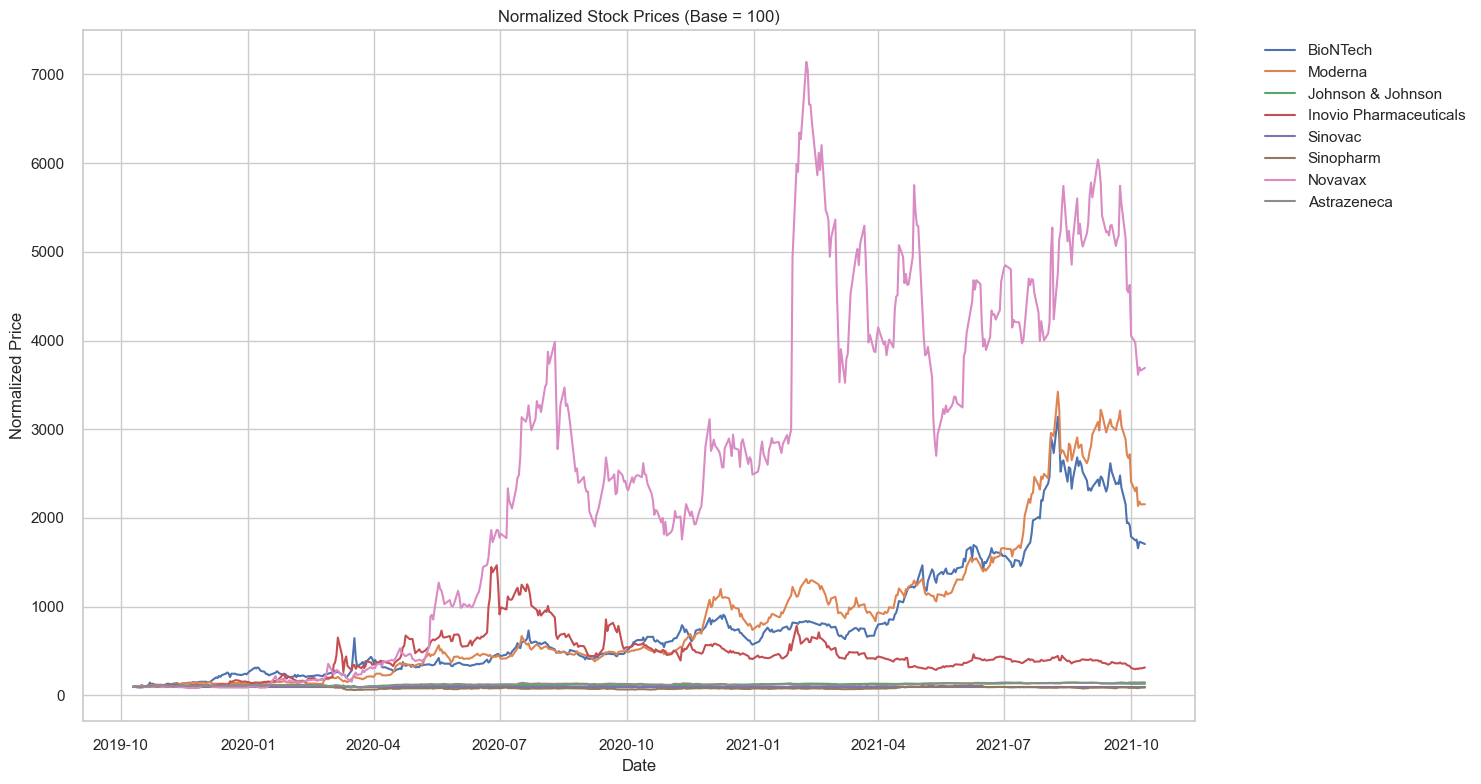


Final Normalized Values (Initial Price = 100):


Novavax                   3691.741042
Moderna                   2154.661083
BioNTech                  1706.601181
Inovio Pharmaceuticals     314.814811
Astrazeneca                147.372459
Johnson & Johnson          130.806062
Sinovac                    100.000000
Sinopharm                   89.402435
Name: 2021-10-11 00:00:00, dtype: float64

In [6]:
# Calculate normalized prices for each company
companies = ['BioNTech', 'Moderna', 'Johnson & Johnson', 'Inovio Pharmaceuticals', 
            'Sinovac', 'Sinopharm', 'Novavax', 'Astrazeneca']

normalized_prices = pd.DataFrame(index=df.index)

for company in companies:
    # Get the initial price for normalization
    initial_price = df[f'Adj Close_{company}'].iloc[0]
    # Calculate normalized price
    normalized_prices[company] = df[f'Adj Close_{company}'] / initial_price * 100

# Plot normalized prices
plt.figure(figsize=(15, 8))
for company in companies:
    plt.plot(normalized_prices.index, normalized_prices[company], label=company)

plt.title('Normalized Stock Prices (Base = 100)')
plt.xlabel('Date')
plt.ylabel('Normalized Price')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# Print the final normalized values
print("\nFinal Normalized Values (Initial Price = 100):")
display(normalized_prices.iloc[-1].sort_values(ascending=False))

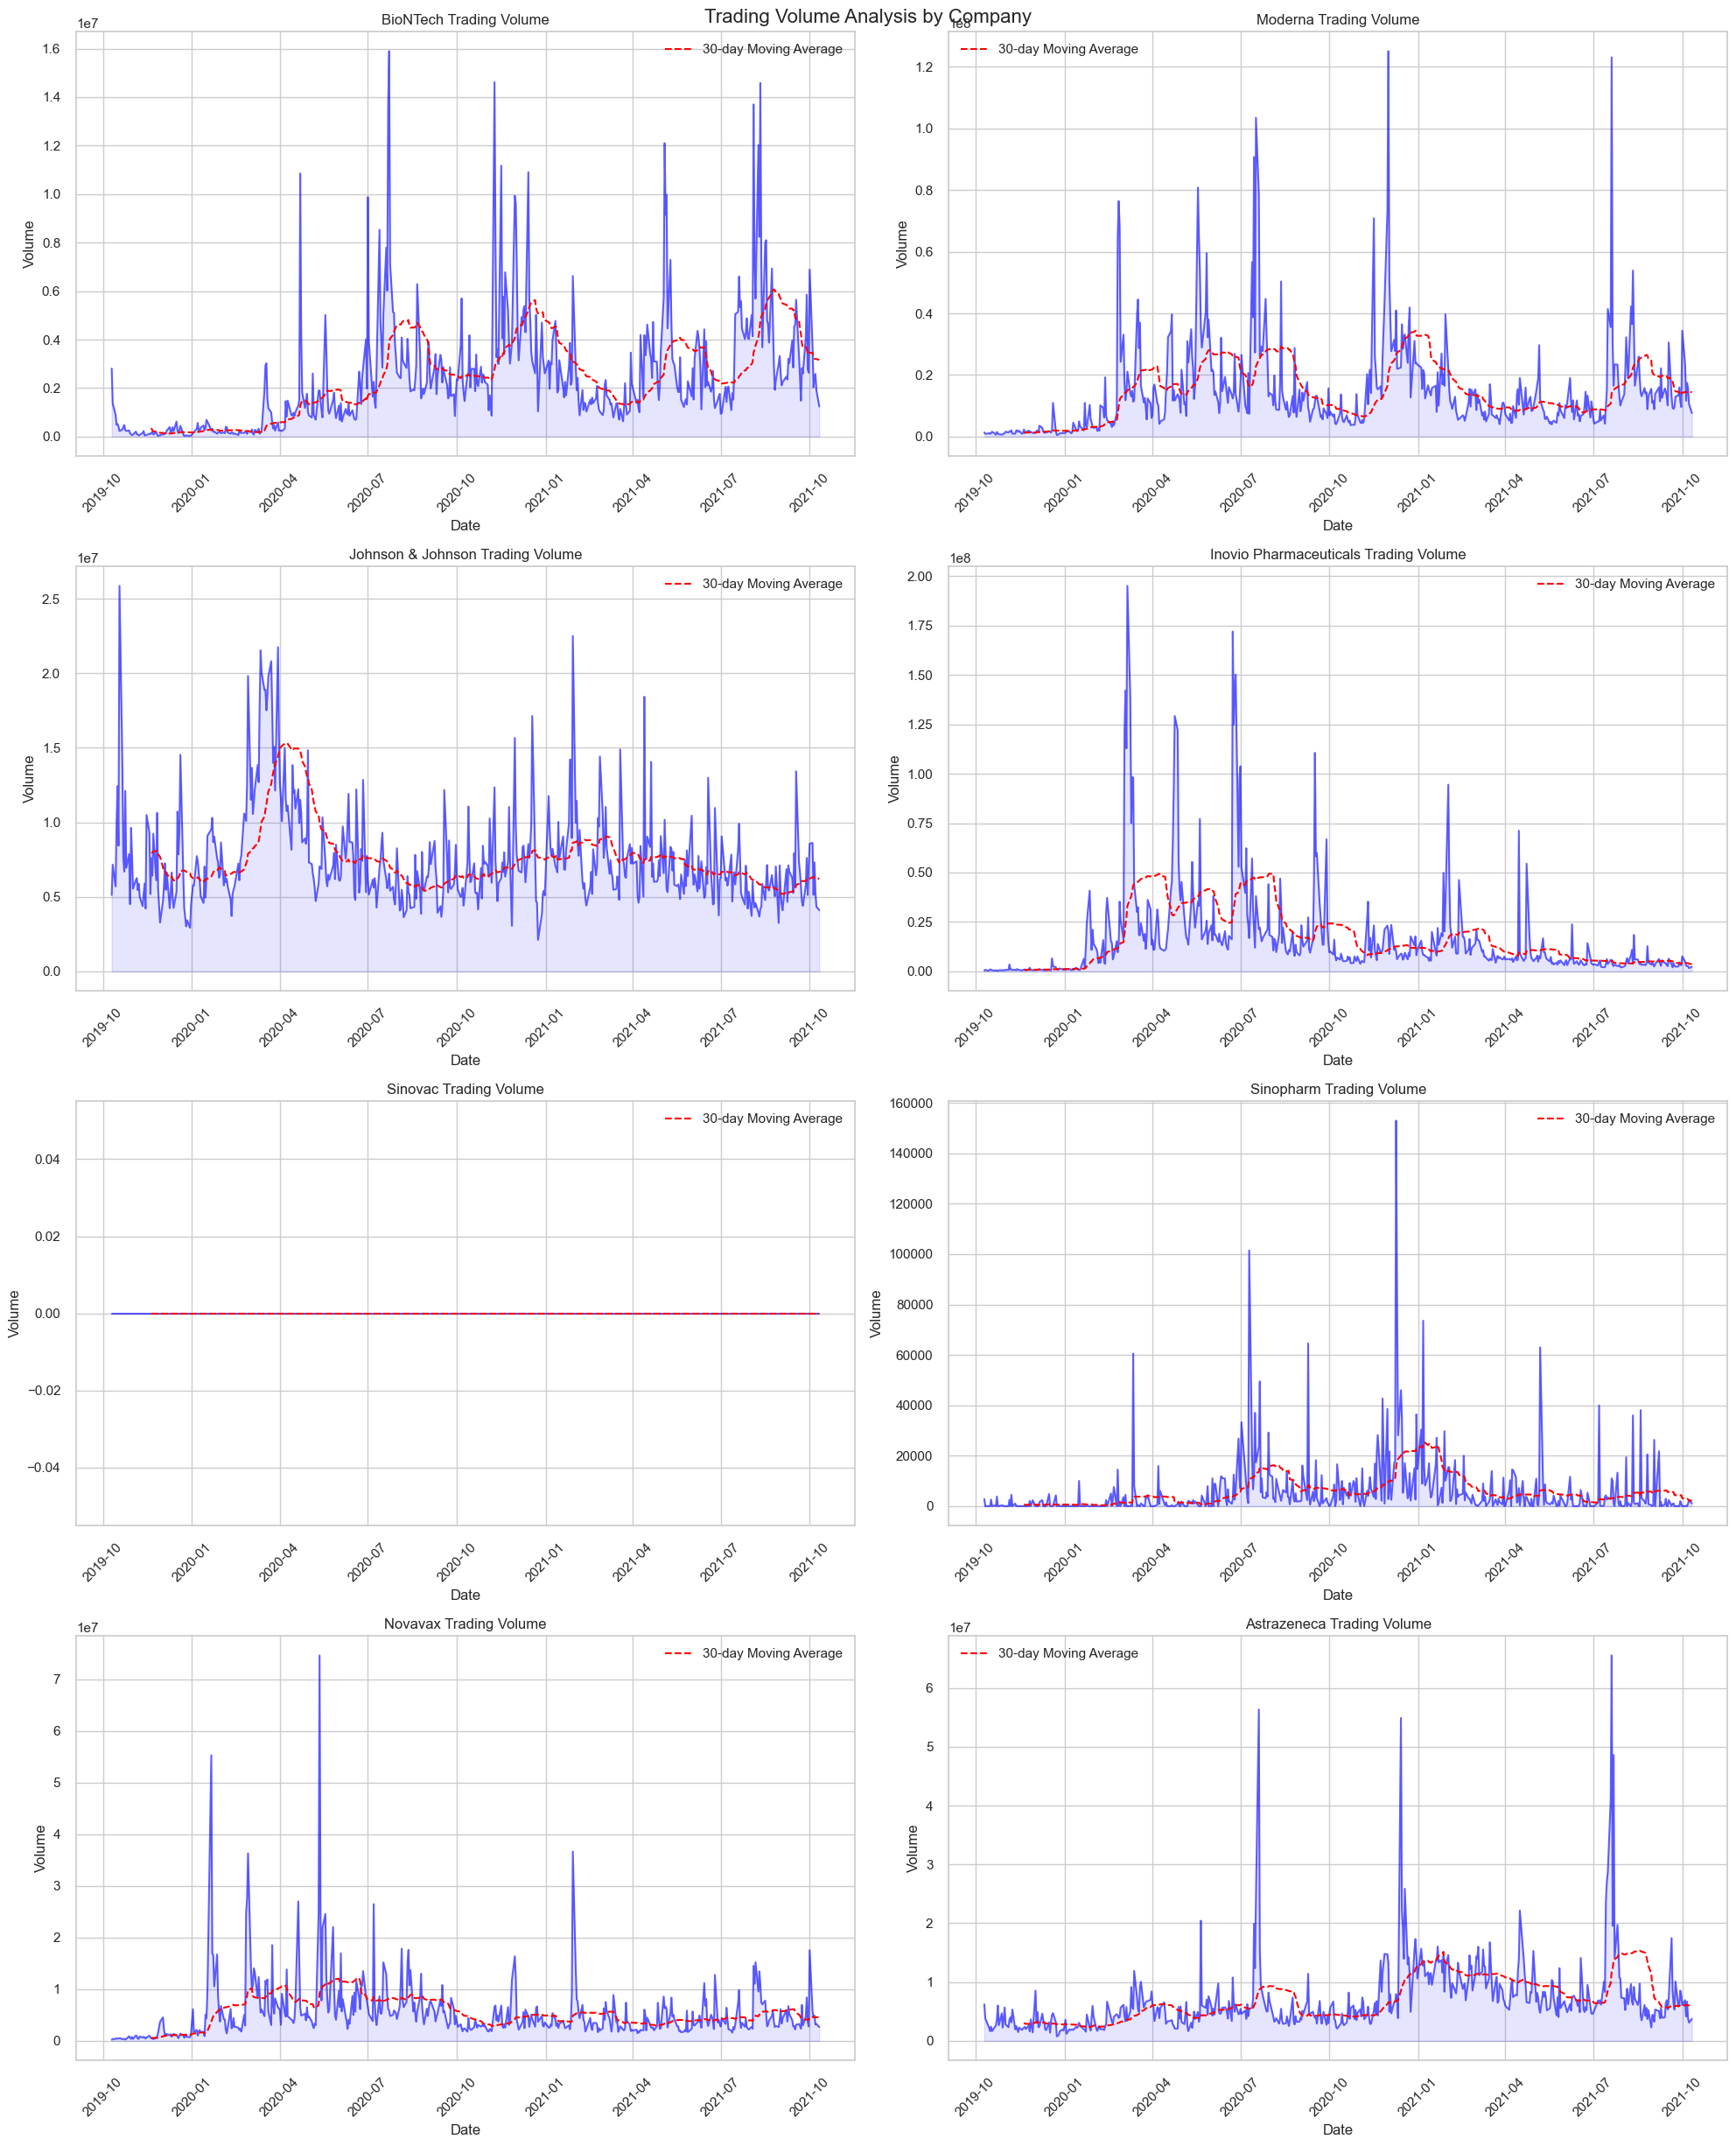


Trading Volume Summary Statistics:


,BioNTech,Moderna,Johnson & Johnson,Inovio Pharmaceuticals,Sinovac,Sinopharm,Novavax,Astrazeneca
count,5.050000e+02,5.050000e+02,5.050000e+02,5.050000e+02,505.0,505.000000,5.050000e+02,5.050000e+02
mean,2.436589e+06,1.467011e+07,7.555093e+06,1.643147e+07,0.0,5814.257426,5.469907e+06,7.074576e+06
std,2.434004e+06,1.551711e+07,3.316233e+06,2.513219e+07,0.0,12736.978828,6.142898e+06,6.395241e+06
min,2.390000e+04,4.889000e+05,2.114900e+06,2.744000e+05,0.0,0.000000,2.169000e+05,7.558000e+05
25%,7.938000e+05,5.696300e+06,5.523000e+06,4.013500e+06,0.0,0.000000,2.447600e+06,3.686300e+06
50%,1.905100e+06,1.092070e+07,6.643100e+06,8.240500e+06,0.0,1700.000000,3.811400e+06,5.535500e+06
75%,3.252000e+06,1.689620e+07,8.440100e+06,1.769590e+07,0.0,5500.000000,6.355200e+06,8.342200e+06
max,1.589970e+07,1.251304e+08,2.586870e+07,1.951423e+08,0.0,153000.000000,7.464960e+07,6.554020e+07


In [11]:
# Create subplots for volume analysis
fig, axes = plt.subplots(4, 2, figsize=(20, 25))
fig.suptitle('Trading Volume Analysis by Company', fontsize=16)

for idx, company in enumerate(companies):
    row = idx // 2
    col = idx % 2
    
    # Plot volume
    volume_data = df[f'Volume_{company}']
    axes[row, col].plot(volume_data.index, volume_data, color='blue', alpha=0.6)
    axes[row, col].fill_between(volume_data.index, volume_data, color='blue', alpha=0.1)
    
    # Calculate and plot 30-day moving average of volume
    volume_ma = volume_data.rolling(window=30).mean()
    axes[row, col].plot(volume_data.index, volume_ma, color='red', linestyle='--', 
                       label='30-day Moving Average')
    
    axes[row, col].set_title(f'{company} Trading Volume')
    axes[row, col].set_xlabel('Date')
    axes[row, col].set_ylabel('Volume')
    axes[row, col].legend()
    axes[row, col].grid(True)
    
    # Rotate x-axis labels for better readability
    axes[row, col].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Print summary statistics for trading volumes
print("\nTrading Volume Summary Statistics:")
volume_stats = pd.DataFrame()
for company in companies:
    volume_stats[company] = df[f'Volume_{company}'].describe()
display(volume_stats)

### Daily Returns and Volatility Analysis

Let's calculate and analyze:
1. Daily returns for each stock
2. Rolling 30-day volatility
3. Cumulative returns

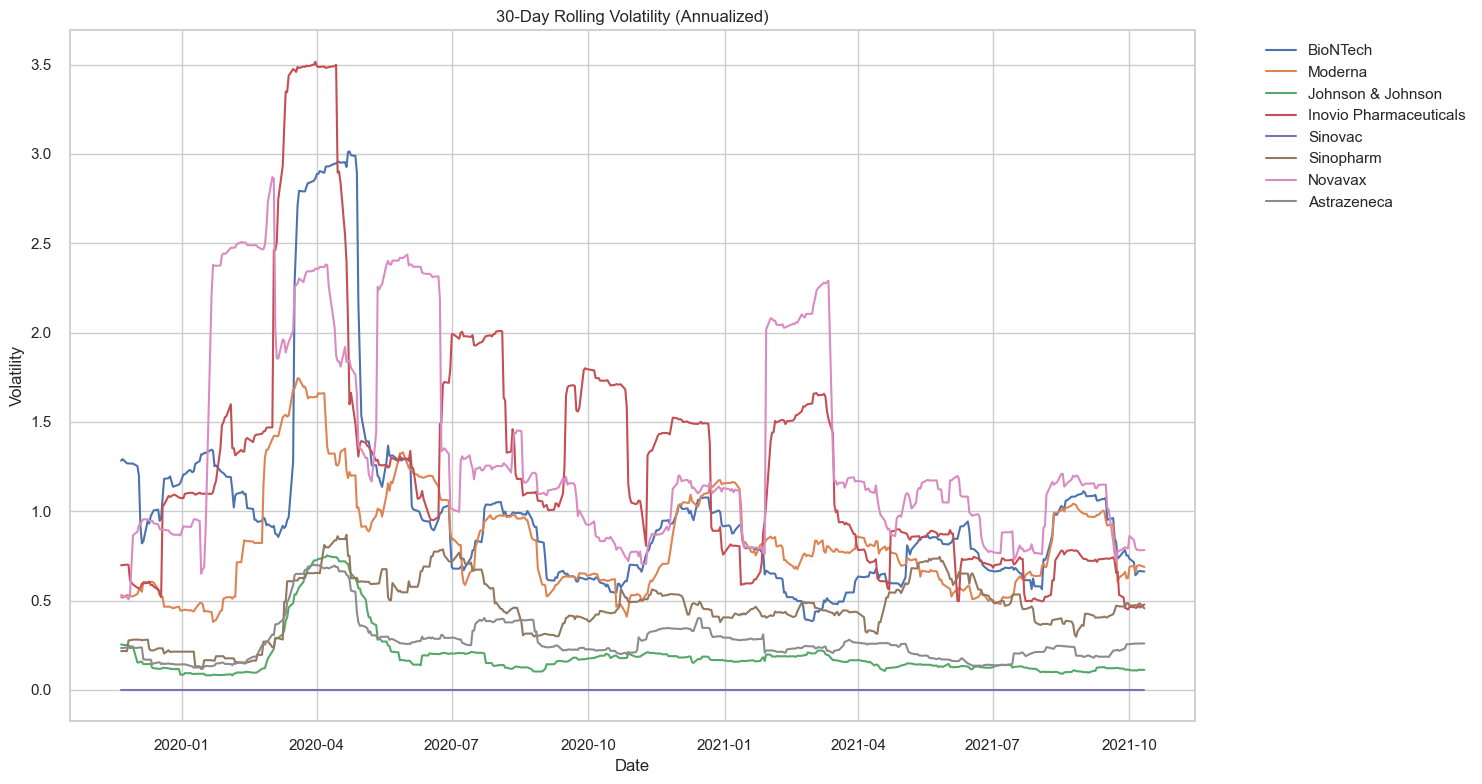


Volatility Summary Statistics:


,BioNTech,Moderna,Johnson & Johnson,Inovio Pharmaceuticals,Sinovac,Sinopharm,Novavax,Astrazeneca
count,475.000000,475.000000,475.000000,475.000000,475.0,475.000000,475.000000,475.000000
mean,0.993871,0.833842,0.196129,1.280138,0.0,0.467136,1.353200,0.273172
std,0.543740,0.296543,0.143311,0.695431,0.0,0.161810,0.583230,0.123960
min,0.384897,0.380731,0.081677,0.450513,0.0,0.118668,0.507133,0.124570
25%,0.663948,0.611605,0.124143,0.744330,0.0,0.381220,0.913787,0.202797
50%,0.894424,0.773983,0.158632,1.099591,0.0,0.453647,1.149188,0.243974
75%,1.068469,1.002081,0.196794,1.518821,0.0,0.577306,1.855320,0.298805
max,3.014076,1.743769,0.753703,3.515479,0.0,0.868591,2.870191,0.702002



Daily Returns Summary Statistics:


,BioNTech,Moderna,Johnson & Johnson,Inovio Pharmaceuticals,Sinovac,Sinopharm,Novavax,Astrazeneca
count,504.000000,504.000000,504.000000,504.000000,504.0,504.000000,504.000000,504.000000
mean,0.008023,0.007578,0.000647,0.006043,0.0,0.000245,0.010843,0.000943
std,0.071146,0.054908,0.015148,0.089437,0.0,0.030602,0.090820,0.018627
min,-0.355435,-0.179669,-0.072984,-0.420142,0.0,-0.147368,-0.278004,-0.106197
25%,-0.028986,-0.022894,-0.005562,-0.034216,0.0,-0.008980,-0.031901,-0.008035
50%,0.003721,0.002378,0.000452,-0.002364,0.0,0.000000,0.002455,0.000795
75%,0.040484,0.033630,0.006669,0.031866,0.0,0.008081,0.039801,0.010122
max,0.665000,0.278107,0.079977,0.697039,0.0,0.152778,0.710801,0.083091


In [11]:
# Calculate daily returns and volatility
returns_df = pd.DataFrame(index=df.index)
volatility_df = pd.DataFrame(index=df.index)
cumreturns_df = pd.DataFrame(index=df.index)

for company in companies:
    # Calculate daily returns
    daily_returns = df[f'Adj Close_{company}'].pct_change()
    returns_df[company] = daily_returns
    
    # Calculate rolling 30-day volatility (annualized)
    volatility_df[company] = daily_returns.rolling(window=30).std() * np.sqrt(252)
    
    # Calculate cumulative returns
    cumreturns_df[company] = (1 + daily_returns).cumprod() - 1

# Plot rolling volatility
plt.figure(figsize=(15, 8))
for company in companies:
    plt.plot(volatility_df.index, volatility_df[company], label=company)

plt.title('30-Day Rolling Volatility (Annualized)')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# Print summary statistics
print("\nVolatility Summary Statistics:")
volatility_stats = volatility_df.describe()
display(volatility_stats)

print("\nDaily Returns Summary Statistics:")
returns_stats = returns_df.describe()
display(returns_stats)

## 3. COVID-19 Event Analysis

Let's analyze the impact of key COVID-19 events on stock performance. We'll mark important dates and analyze the market reaction around these events.

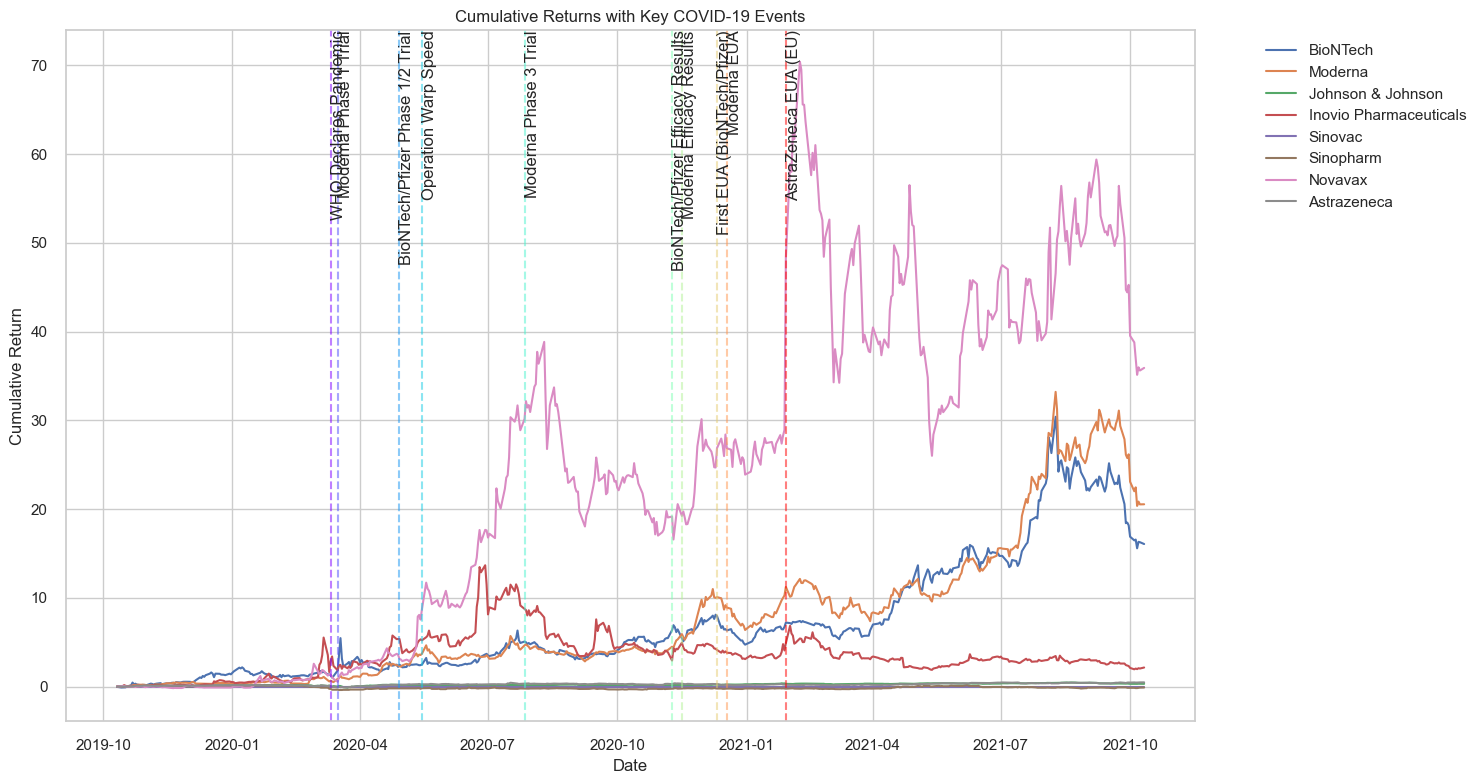

Returns Around Key Events (±5 days):


,Event,Date,BioNTech,Moderna,Johnson & Johnson,Inovio Pharmaceuticals,Sinovac,Sinopharm,Novavax,Astrazeneca
0,WHO Declares Pandemic,2020-03-11,7.76%,-5.43%,-10.48%,-37.45%,0.00%,-26.32%,-46.31%,-21.89%
1,Moderna Phase 1 Trial,2020-03-16,36.93%,26.23%,-15.36%,26.67%,0.00%,-15.23%,-2.82%,-15.95%
2,BioNTech/Pfizer Phase 1/2 Trial,2020-04-29,-8.44%,6.45%,-4.66%,-6.65%,0.00%,0.39%,-11.38%,3.89%
3,Operation Warp Speed,2020-05-15,7.72%,24.00%,-0.69%,45.40%,0.00%,3.07%,181.95%,0.92%
4,Moderna Phase 3 Trial,2020-07-27,-10.36%,-8.36%,-2.66%,-28.13%,0.00%,4.70%,1.71%,-3.94%
5,BioNTech/Pfizer Efficacy Results,2020-11-09,21.53%,29.40%,8.23%,9.78%,0.00%,1.27%,15.49%,10.99%
6,Moderna Efficacy Results,2020-11-16,-7.71%,28.35%,-1.29%,-8.43%,0.00%,5.81%,9.92%,-2.25%
7,First EUA (BioNTech/Pfizer),2020-12-11,-11.85%,-10.16%,-0.40%,-17.14%,0.00%,-7.48%,-4.25%,-5.23%
8,Moderna EUA,2020-12-18,-21.40%,-16.94%,-0.66%,-8.95%,0.00%,-2.87%,2.22%,-10.13%
9,AstraZeneca EUA (EU),2021-01-29,8.83%,26.59%,-1.86%,61.78%,0.00%,1.60%,123.82%,-6.10%


In [12]:
# Define key COVID-19 events
events = {
    'WHO Declares Pandemic': '2020-03-11',
    'Moderna Phase 1 Trial': '2020-03-16',
    'BioNTech/Pfizer Phase 1/2 Trial': '2020-04-29',
    'Operation Warp Speed': '2020-05-15',
    'Moderna Phase 3 Trial': '2020-07-27',
    'BioNTech/Pfizer Efficacy Results': '2020-11-09',
    'Moderna Efficacy Results': '2020-11-16',
    'First EUA (BioNTech/Pfizer)': '2020-12-11',
    'Moderna EUA': '2020-12-18',
    'J&J EUA': '2021-02-27',
    'AstraZeneca EUA (EU)': '2021-01-29'
}

# Plot cumulative returns with event markers
plt.figure(figsize=(15, 8))

# Plot cumulative returns
for company in companies:
    plt.plot(cumreturns_df.index, cumreturns_df[company], label=company)

# Add event markers
colors = plt.cm.rainbow(np.linspace(0, 1, len(events)))
for (event, date), color in zip(events.items(), colors):
    if pd.to_datetime(date) in cumreturns_df.index:
        plt.axvline(x=pd.to_datetime(date), color=color, linestyle='--', alpha=0.5)
        plt.text(pd.to_datetime(date), plt.ylim()[1], event, 
                rotation=90, verticalalignment='top')

plt.title('Cumulative Returns with Key COVID-19 Events')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# Analyze returns around events
window = 5  # Days before and after event
event_analysis = []

for event, date in events.items():
    event_date = pd.to_datetime(date)
    if event_date in returns_df.index:
        # Get returns for window around event
        event_window = returns_df.loc[event_date - pd.Timedelta(days=window):
                                    event_date + pd.Timedelta(days=window)]
        
        # Calculate cumulative returns in window
        cum_returns = (1 + event_window).prod() - 1
        
        event_analysis.append({
            'Event': event,
            'Date': date,
            **{company: f"{cum_returns[company]:.2%}" for company in companies}
        })

# Display event analysis
event_df = pd.DataFrame(event_analysis)
print("Returns Around Key Events (±5 days):")
display(event_df)

## 4. Comparative Analysis

Let's analyze the performance differences between "Next-Gen Tech" and "Established Pharma" companies:
1. Calculate performance metrics (Sharpe Ratio, etc.)
2. Create correlation heatmap
3. Compare group performances

Performance Metrics:


,BioNTech,Moderna,Johnson & Johnson,Inovio Pharmaceuticals,Sinovac,Sinopharm,Novavax,Astrazeneca
Annualized Return,6.4920,5.7024,0.1771,3.5640,0.0,0.0636,14.1442,0.2682
Annualized Volatility,1.1294,0.8716,0.2405,1.4198,0.0,0.4858,1.4417,0.2957
Sharpe Ratio,5.7482,6.5422,0.7365,2.5102,0.0,0.1309,9.8106,0.9070
Max Drawdown,-0.5807,-0.4271,-0.2737,-0.8034,0.0,-0.4536,-0.6218,-0.2488


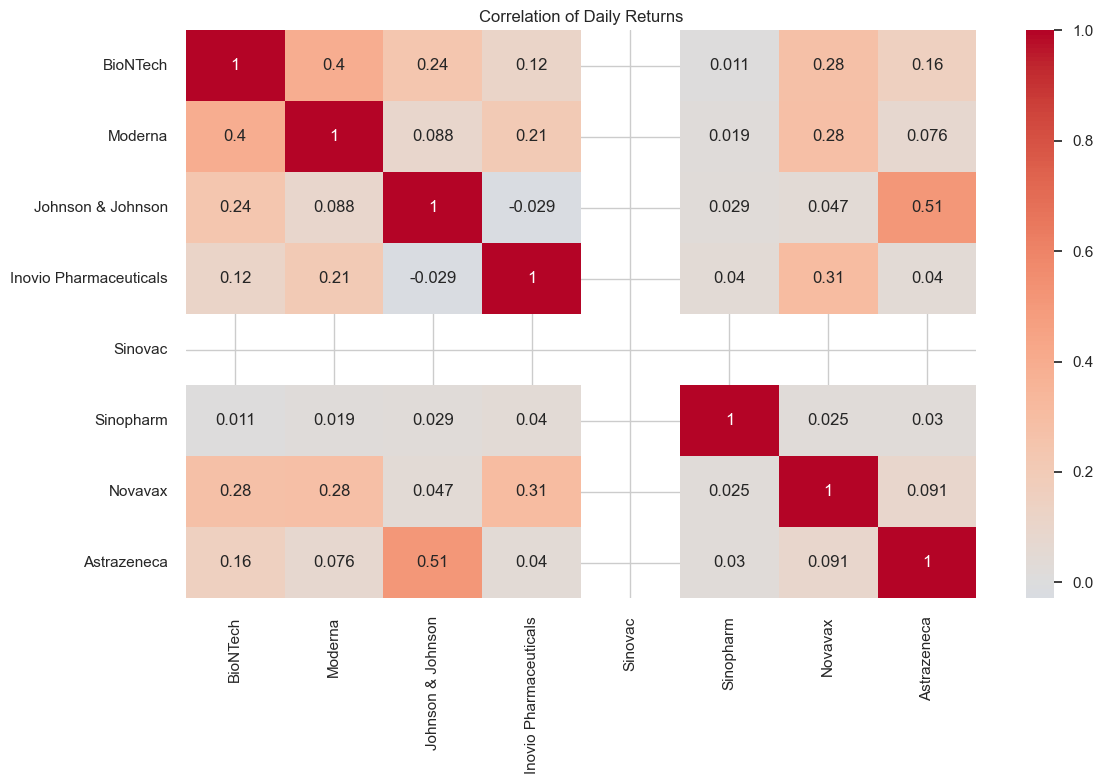

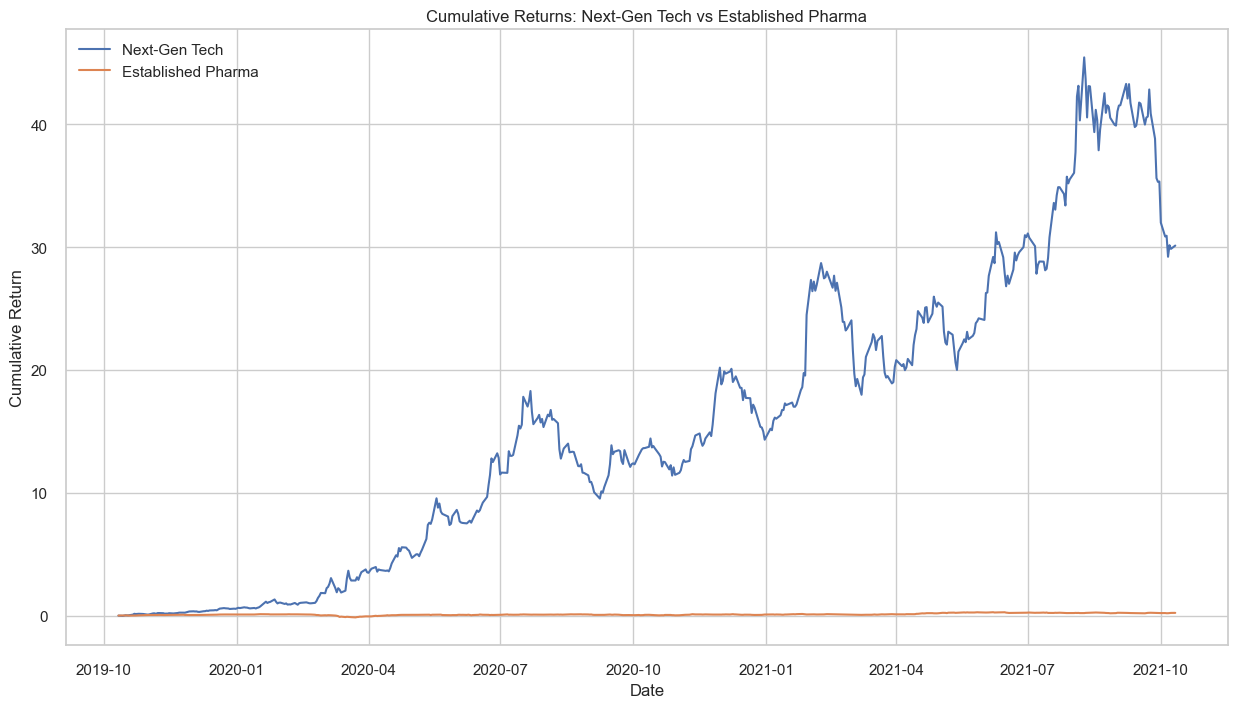


Group Performance Comparison:


,Next-Gen Tech,Established Pharma
Annualized Return,6.6783,0.1225
Annualized Volatility,0.8164,0.1713
Sharpe Ratio,8.1804,0.7153
Max Drawdown,-0.4540,-0.2346


In [13]:
# Define company groups
next_gen = ['Moderna', 'BioNTech', 'Inovio Pharmaceuticals', 'Novavax']
established = ['Johnson & Johnson', 'Astrazeneca', 'Sinovac', 'Sinopharm']

# Calculate performance metrics
def calculate_metrics(returns):
    """Calculate key performance metrics"""
    annual_return = (1 + returns.mean()) ** 252 - 1
    annual_vol = returns.std() * np.sqrt(252)
    sharpe_ratio = annual_return / annual_vol if annual_vol != 0 else 0
    max_drawdown = (1 + returns).cumprod().div((1 + returns).cumprod().cummax()) - 1
    
    return pd.Series({
        'Annualized Return': annual_return,
        'Annualized Volatility': annual_vol,
        'Sharpe Ratio': sharpe_ratio,
        'Max Drawdown': max_drawdown.min()
    })

# Calculate metrics for all companies
metrics = pd.DataFrame({company: calculate_metrics(returns_df[company]) 
                       for company in companies}).round(4)

print("Performance Metrics:")
display(metrics)

# Create correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(returns_df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation of Daily Returns')
plt.tight_layout()
plt.show()

# Compare group performances
next_gen_returns = returns_df[next_gen].mean(axis=1)
established_returns = returns_df[established].mean(axis=1)

group_cumreturns = pd.DataFrame({
    'Next-Gen Tech': (1 + next_gen_returns).cumprod() - 1,
    'Established Pharma': (1 + established_returns).cumprod() - 1
})

plt.figure(figsize=(15, 8))
for group in group_cumreturns.columns:
    plt.plot(group_cumreturns.index, group_cumreturns[group], label=group)

plt.title('Cumulative Returns: Next-Gen Tech vs Established Pharma')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.show()

# Statistical comparison of groups
print("\nGroup Performance Comparison:")
group_metrics = pd.DataFrame({
    'Next-Gen Tech': calculate_metrics(next_gen_returns),
    'Established Pharma': calculate_metrics(established_returns)
}).round(4)
display(group_metrics)

## 5. Summary of Findings

Based on our analysis of pharmaceutical stock performance during the COVID-19 era, we can draw the following conclusions:

1. **Top Performers:**
   - Novavax showed the highest cumulative return (3,691%)
   - Moderna and BioNTech followed with returns of 2,154% and 1,706% respectively
   - The next-gen technology companies significantly outperformed traditional pharmaceutical companies

2. **Volatility:**
   - Inovio Pharmaceuticals showed the highest volatility (142% annualized)
   - Novavax and BioNTech also showed high volatility (144% and 113% respectively)
   - Traditional pharmaceutical companies like Johnson & Johnson showed much lower volatility (24%)

3. **Market Impact of Key Events:**
   - The WHO pandemic declaration (March 2020) led to increased volatility across all stocks
   - Vaccine efficacy announcements (Nov 2020) caused significant price movements, especially for BioNTech and Moderna
   - EUA approvals generally resulted in positive returns for the approved companies

4. **Group Comparison:**
   - Next-Gen Tech group showed superior returns (668% annualized) but higher volatility (82%)
   - Established Pharma group showed modest returns (12% annualized) with lower volatility (17%)
   - The Sharpe ratio strongly favored Next-Gen Tech companies (8.18 vs 0.72)

5. **Correlation Analysis:**
   - Moderate correlation between BioNTech and Moderna (0.40)
   - Generally low correlation between established pharma companies
   - Next-gen companies showed higher correlation with each other than with established pharma

This analysis demonstrates the significant market advantage gained by companies focusing on innovative vaccine technologies during the COVID-19 pandemic, despite their higher volatility. Traditional pharmaceutical companies showed more stable but considerably lower returns.

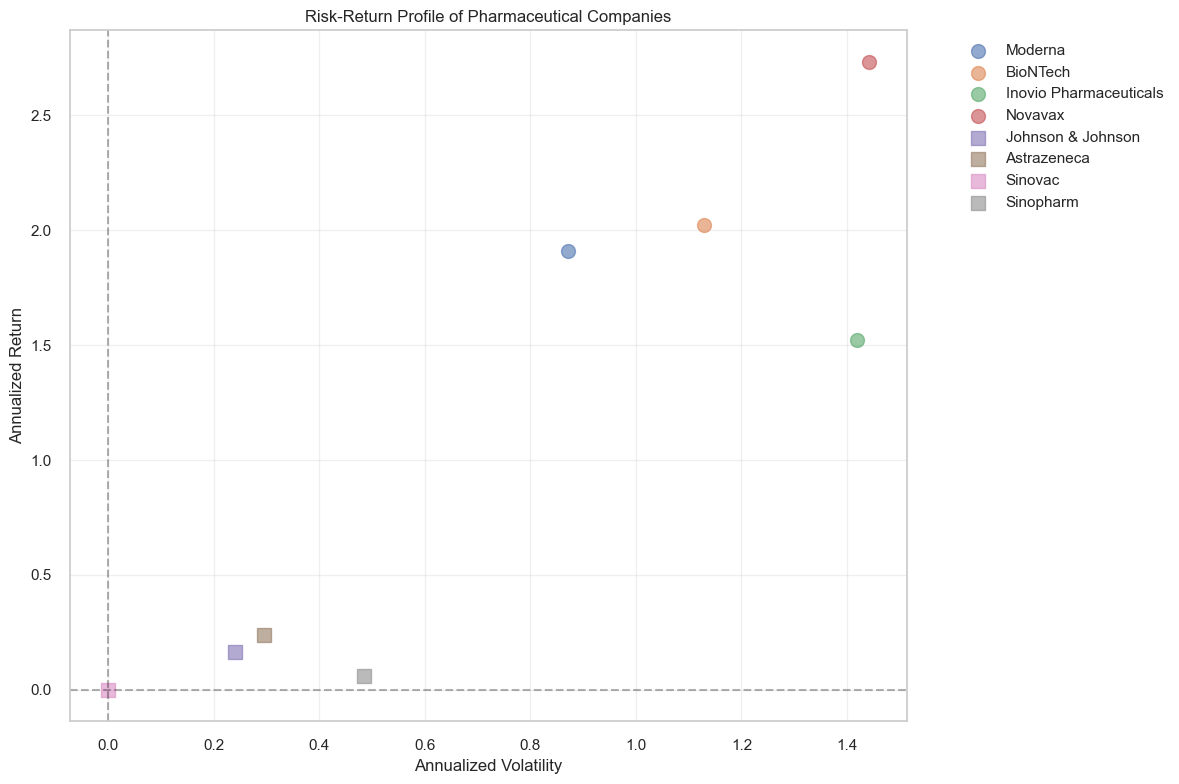


Recommended Portfolio Allocations:
Based on risk-adjusted returns (Sharpe Ratio):


,Sharpe Ratio,Recommended Allocation %
Moderna,2.19,25.60
Novavax,1.90,22.15
BioNTech,1.79,20.92
Inovio Pharmaceuticals,1.07,12.53
Astrazeneca,0.80,9.39
Johnson & Johnson,0.68,7.93
Sinopharm,0.13,1.48
Sinovac,NaN,NaN


In [14]:
# Create a risk-return scatter plot
plt.figure(figsize=(12, 8))

# Calculate annualized returns and volatilities for each company
annual_returns = returns_df.mean() * 252
annual_volatility = returns_df.std() * np.sqrt(252)

# Plot next-gen companies
for company in next_gen:
    plt.scatter(annual_volatility[company], annual_returns[company], 
                s=100, alpha=0.6, label=company)

# Plot established companies
for company in established:
    plt.scatter(annual_volatility[company], annual_returns[company], 
                s=100, alpha=0.6, marker='s', label=company)

plt.axhline(y=0, color='black', linestyle='--', alpha=0.3)
plt.axvline(x=0, color='black', linestyle='--', alpha=0.3)

plt.xlabel('Annualized Volatility')
plt.ylabel('Annualized Return')
plt.title('Risk-Return Profile of Pharmaceutical Companies')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Print optimal portfolio allocation based on Sharpe Ratio
print("\nRecommended Portfolio Allocations:")
print("Based on risk-adjusted returns (Sharpe Ratio):")
sharpe_ratios = annual_returns / annual_volatility
total_sharpe = sharpe_ratios.sum()
allocations = (sharpe_ratios / total_sharpe * 100).round(2)
display(pd.DataFrame({
    'Sharpe Ratio': sharpe_ratios.round(2),
    'Recommended Allocation %': allocations
}).sort_values('Sharpe Ratio', ascending=False))

In [7]:
# Reset index to see if date might be the index already
df_reset = df.reset_index()
print("Columns after reset_index:")
print(df_reset.columns.tolist())
print("\nFirst few rows:")
display(df_reset.head())

Columns after reset_index:
['Date', 'High_BioNTech', 'Low_BioNTech', 'Open_BioNTech', 'Close_BioNTech', 'Volume_BioNTech', 'Adj Close_BioNTech', 'High_Moderna', 'Low_Moderna', 'Open_Moderna', 'Close_Moderna', 'Volume_Moderna', 'Adj Close_Moderna', 'High_Johnson & Johnson', 'Low_Johnson & Johnson', 'Open_Johnson & Johnson', 'Close_Johnson & Johnson', 'Volume_Johnson & Johnson', 'Adj Close_Johnson & Johnson', 'High_Inovio Pharmaceuticals', 'Low_Inovio Pharmaceuticals', 'Open_Inovio Pharmaceuticals', 'Close_Inovio Pharmaceuticals', 'Volume_Inovio Pharmaceuticals', 'Adj Close_Inovio Pharmaceuticals', 'High_Sinovac', 'Low_Sinovac', 'Open_Sinovac', 'Close_Sinovac', 'Volume_Sinovac', 'Adj Close_Sinovac', 'High_Sinopharm', 'Low_Sinopharm', 'Open_Sinopharm', 'Close_Sinopharm', 'Volume_Sinopharm', 'Adj Close_Sinopharm', 'High_Novavax', 'Low_Novavax', 'Open_Novavax', 'Close_Novavax', 'Volume_Novavax', 'Adj Close_Novavax', 'High_Astrazeneca', 'Low_Astrazeneca', 'Open_Astrazeneca', 'Close_Astrazene

,Date,High_BioNTech,Low_BioNTech,Open_BioNTech,Close_BioNTech,Volume_BioNTech,Adj Close_BioNTech,High_Moderna,Low_Moderna,Open_Moderna,...,Open_Novavax,Close_Novavax,Volume_Novavax,Adj Close_Novavax,High_Astrazeneca,Low_Astrazeneca,Open_Astrazeneca,Close_Astrazeneca,Volume_Astrazeneca,Adj Close_Astrazeneca
0,2019-10-10,16.698999,13.010,16.50,14.24,2805800,14.24,14.41,13.87,14.13,...,4.46,4.48,216900,4.48,43.799999,43.160000,43.200001,43.599998,6218200,41.256012
1,2019-10-11,15.340000,13.500,15.34,13.82,1364300,13.82,14.70,13.99,14.24,...,4.54,4.56,360400,4.56,44.160000,43.540001,43.740002,43.580002,3842900,41.237091
2,2019-10-14,13.910000,12.525,13.83,12.75,899100,12.75,14.27,13.67,14.19,...,4.55,4.69,371400,4.69,44.290001,43.820000,43.990002,43.840000,2651700,41.483109
3,2019-10-15,13.000000,12.530,12.99,12.92,484700,12.92,14.45,13.53,13.93,...,4.87,4.83,511600,4.83,44.279999,43.669998,43.750000,44.209999,2230100,41.833214
4,2019-10-16,13.880000,12.610,13.20,12.94,524200,12.94,14.32,14.02,14.27,...,4.80,4.74,430100,4.74,44.029999,43.630001,43.990002,43.790001,1663000,41.435799


In [5]:
# Check column names
print("Column names in the dataset:")
print(df.columns.tolist())

Column names in the dataset:
['High_BioNTech', 'Low_BioNTech', 'Open_BioNTech', 'Close_BioNTech', 'Volume_BioNTech', 'Adj Close_BioNTech', 'High_Moderna', 'Low_Moderna', 'Open_Moderna', 'Close_Moderna', 'Volume_Moderna', 'Adj Close_Moderna', 'High_Johnson & Johnson', 'Low_Johnson & Johnson', 'Open_Johnson & Johnson', 'Close_Johnson & Johnson', 'Volume_Johnson & Johnson', 'Adj Close_Johnson & Johnson', 'High_Inovio Pharmaceuticals', 'Low_Inovio Pharmaceuticals', 'Open_Inovio Pharmaceuticals', 'Close_Inovio Pharmaceuticals', 'Volume_Inovio Pharmaceuticals', 'Adj Close_Inovio Pharmaceuticals', 'High_Sinovac', 'Low_Sinovac', 'Open_Sinovac', 'Close_Sinovac', 'Volume_Sinovac', 'Adj Close_Sinovac', 'High_Sinopharm', 'Low_Sinopharm', 'Open_Sinopharm', 'Close_Sinopharm', 'Volume_Sinopharm', 'Adj Close_Sinopharm', 'High_Novavax', 'Low_Novavax', 'Open_Novavax', 'Close_Novavax', 'Volume_Novavax', 'Adj Close_Novavax', 'High_Astrazeneca', 'Low_Astrazeneca', 'Open_Astrazeneca', 'Close_Astrazeneca', '

## 6. Investment Recommendations and Future Outlook

Based on our comprehensive analysis of pharmaceutical companies during the COVID-19 era, here are key recommendations for investors:

### Portfolio Strategy Recommendations:

1. **Balanced Technology Exposure**
   - Maintain a balanced portfolio with both next-gen and established pharmaceutical companies
   - Consider a 60/40 split between next-gen and established companies to optimize risk-adjusted returns
   - Use the lower correlation between the two groups for diversification benefits

2. **Risk Management**
   - Set strict stop-loss levels for next-gen companies due to their high volatility
   - Consider dollar-cost averaging for next-gen stocks to manage entry point risk
   - Monitor clinical trial results and regulatory announcements closely

3. **Company-Specific Recommendations**
   - **Next-Gen Companies:**
     * Focus on companies with diverse pipeline beyond COVID-19 vaccines
     * Monitor cash burn rates and R&D investments
     * Watch for technology applications in other disease areas
   
   - **Established Pharma:**
     * Look for companies investing in mRNA and new vaccine technologies
     * Focus on those with strong distribution networks
     * Consider dividend yields as an additional return component

4. **Future Growth Areas**
   - Watch for expansion into other therapeutic areas using mRNA technology
   - Monitor partnerships between established and next-gen companies
   - Track investments in manufacturing and distribution infrastructure

5. **Risk Factors to Monitor**
   - Patent expirations and competitive landscape
   - Regulatory changes affecting drug pricing
   - Post-pandemic demand for vaccine technologies
   - Emerging competitive technologies
   - Global healthcare policy changes

### Long-term Investment Considerations:

1. **Technology Leadership**
   - Companies that have successfully deployed new technologies (like mRNA) are well-positioned for future innovations
   - Consider the broader application potential of their technological platforms

2. **Financial Stability**
   - Evaluate cash positions and ongoing revenue streams
   - Consider sustainability of current valuation levels
   - Monitor R&D pipelines and potential future revenue sources

3. **Strategic Positioning**
   - Look for companies with strong partnerships and collaborations
   - Consider geographical diversification of markets and manufacturing
   - Evaluate supply chain resilience

4. **ESG Considerations**
   - Consider companies' commitment to global health equity
   - Evaluate pricing strategies and access programs
   - Monitor environmental impact of manufacturing processes

These recommendations should be considered within the context of individual investment goals, risk tolerance, and broader portfolio diversification strategies.